In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
team_data = pd.read_csv('data/nhl_standings.csv')

In [5]:
team_data['GD per game'] = (team_data['GF'] - team_data['GA']) / team_data['GP']

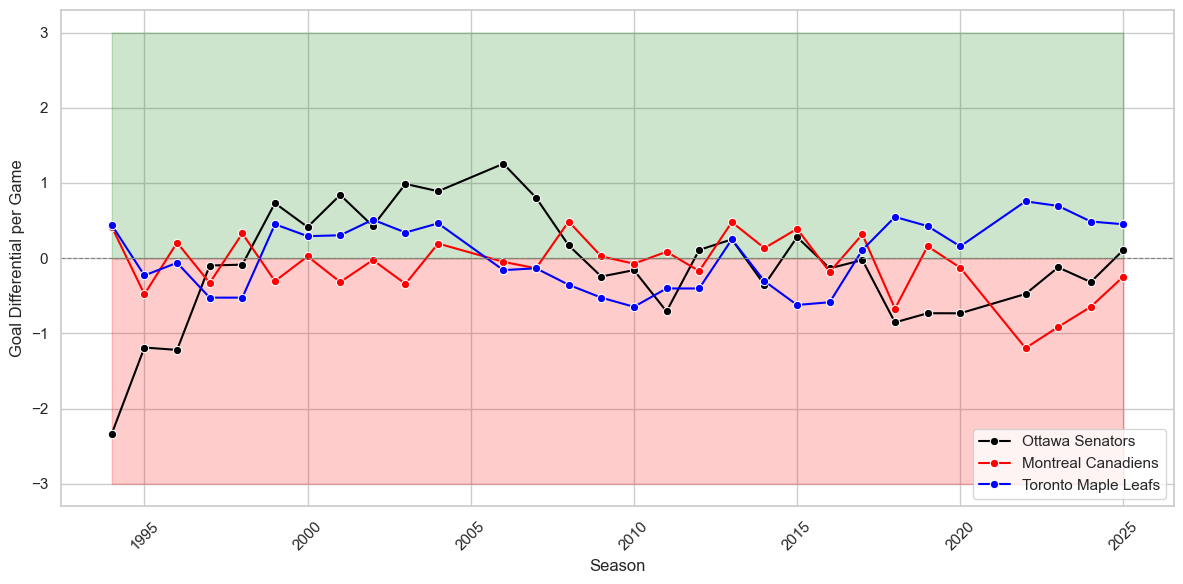

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_data[team_data['team']=='Ottawa Senators'], 
             x='season', y='GD per game', marker='o', color='black', label='Ottawa Senators')
sns.lineplot(data=team_data[team_data['team']=='Montreal Canadiens'],
             x='season', y='GD per game', marker='o', color='red', label='Montreal Canadiens')
sns.lineplot(data=team_data[team_data['team']=='Toronto Maple Leafs'],
             x='season', y='GD per game', marker='o', color='blue', label='Toronto Maple Leafs')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.fill_between(team_data['season'], -3, 0, color='red', alpha=0.2)
plt.fill_between(team_data['season'], 0, 3, color='green', alpha=0.2)
plt.xlabel('Season')
plt.ylabel('Goal Differential per Game')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [7]:
player_data = pd.read_csv('data/nhl_stats.csv')

In [45]:
# dictionary with full team names and abbreviations
team_name_dict = {
    'ANA': 'Anaheim Ducks',
    'ARI': 'Arizona Coyotes',
    'BOS': 'Boston Bruins',
    'BUF': 'Buffalo Sabres',
    'CGY': 'Calgary Flames',
    'CAR': 'Carolina Hurricanes',
    'CHI': 'Chicago Blackhawks',
    'COL': 'Colorado Avalanche',
    'CBJ': 'Columbus Blue Jackets',
    'DAL': 'Dallas Stars',
    'DET': 'Detroit Red Wings',
    'EDM': 'Edmonton Oilers',
    'FLA': 'Florida Panthers',
    'LAK': 'Los Angeles Kings',
    'MIN': 'Minnesota Wild',
    'MTL': 'Montreal Canadiens',
    'NJD': 'New Jersey Devils',
    'NSH': 'Nashville Predators',
    'NYI': 'New York Islanders',
    'NYR': 'New York Rangers',
    'OTT': 'Ottawa Senators',
    'PHI': 'Philadelphia Flyers',
    'PIT': 'Pittsburgh Penguins',
    'TOR': 'Toronto Maple Leafs',
    'STL': 'St. Louis Blues',
    'WPG': 'Winnipeg Jets',
    'VAN': 'Vancouver Canucks',
    'SJS': 'San Jose Sharks',
    'MDA': 'Mighty Ducks of Anaheim',
    'WSH': 'Washington Capitals',
    'TBL': 'Tampa Bay Lightning',
    'QUE': 'Quebec Nordiques',
    'HFD': 'Hartford Whalers',
    'PHX': 'Phoenix Coyotes',
    'ATL': 'Atlanta Thrashers',
    'VEG': 'Vegas Golden Knights',
    'SEA': 'Seattle Kraken',
    'UTA': 'Utah Hockey Club'
}

In [48]:
player_data['team'] = player_data['team'].map(team_name_dict)

In [67]:
combined_data = player_data.merge(team_data, left_on=['season', 'team'], right_on=['season', 'team'], how='inner')

In [70]:
combined_data

,name,age,team,position,TOI,season,GF,GA,GP,GD per game
0,JaromÃ­r JÃ¡gr,25.0,Pittsburgh Penguins,RW,1748.716667,1998,228.0,188.0,82.0,0.487805
1,Ron Francis,34.0,Pittsburgh Penguins,C,1809.400000,1998,228.0,188.0,82.0,0.487805
2,Stu Barnes,27.0,Pittsburgh Penguins,LW,1668.733333,1998,228.0,188.0,82.0,0.487805
3,Kevin Hatcher,31.0,Pittsburgh Penguins,D,1800.666667,1998,228.0,188.0,82.0,0.487805
4,Martin Straka,25.0,Pittsburgh Penguins,C,1361.866667,1998,228.0,188.0,82.0,0.487805
...,...,...,...,...,...,...,...,...,...,...
27697,LukÃ¡Å¡ DostÃ¡l,24.0,Anaheim Ducks,G,3057.650000,2025,221.0,263.0,82.0,-0.512195
27698,Ville Husso,29.0,Anaheim Ducks,G,200.950000,2025,221.0,263.0,82.0,-0.512195
27699,Tristan Luneau,21.0,Anaheim Ducks,D,99.333333,2025,221.0,263.0,82.0,-0.512195
27700,James Reimer,36.0,Anaheim Ducks,G,120.000000,2025,221.0,263.0,82.0,-0.512195


In [77]:
combined_data['rating'] = (combined_data['GD per game'] + abs(combined_data['GD per game'].min())) * combined_data['TOI']

In [78]:
combined_data[combined_data['name']=='Jussi Jokinen']

,name,age,team,position,TOI,season,GF,GA,GP,GD per game,team_strength,rating
8061,Jussi Jokinen,22.0,Dallas Stars,LW,1099.483333,2006,265.0,218.0,82.0,0.573171,2.402439,2641.441667
9316,Jussi Jokinen,23.0,Dallas Stars,LW,1139.583333,2007,226.0,197.0,82.0,0.353659,2.182927,2487.627033
9631,Jussi Jokinen,24.0,Tampa Bay Lightning,LW,378.883333,2008,223.0,267.0,82.0,-0.536585,1.292683,489.776016
9791,Jussi Jokinen,24.0,Dallas Stars,LW,661.983333,2008,242.0,207.0,82.0,0.426829,2.256098,1493.498984
10854,Jussi Jokinen,25.0,Tampa Bay Lightning,LW,719.283333,2009,210.0,279.0,82.0,-0.841463,0.987805,710.511585
11018,Jussi Jokinen,25.0,Carolina Hurricanes,LW,367.933333,2009,239.0,226.0,82.0,0.158537,1.987805,731.379675
12120,Jussi Jokinen,26.0,Carolina Hurricanes,LW,1362.016667,2010,230.0,256.0,82.0,-0.317073,1.512195,2059.634959
12847,Jussi Jokinen,27.0,Carolina Hurricanes,LW,1205.716667,2011,236.0,239.0,82.0,-0.036585,1.792683,2161.467683
14176,Jussi Jokinen,28.0,Carolina Hurricanes,LW,1396.100000,2012,213.0,243.0,82.0,-0.365854,1.463415,2043.073171
14731,Jussi Jokinen,29.0,Pittsburgh Penguins,LW,149.166667,2013,165.0,119.0,48.0,0.958333,2.787602,415.817243


In [79]:
combined_data_agg = combined_data.groupby(['season', 'name']).agg({'rating': 'sum', 'position': 'first'}).reset_index()

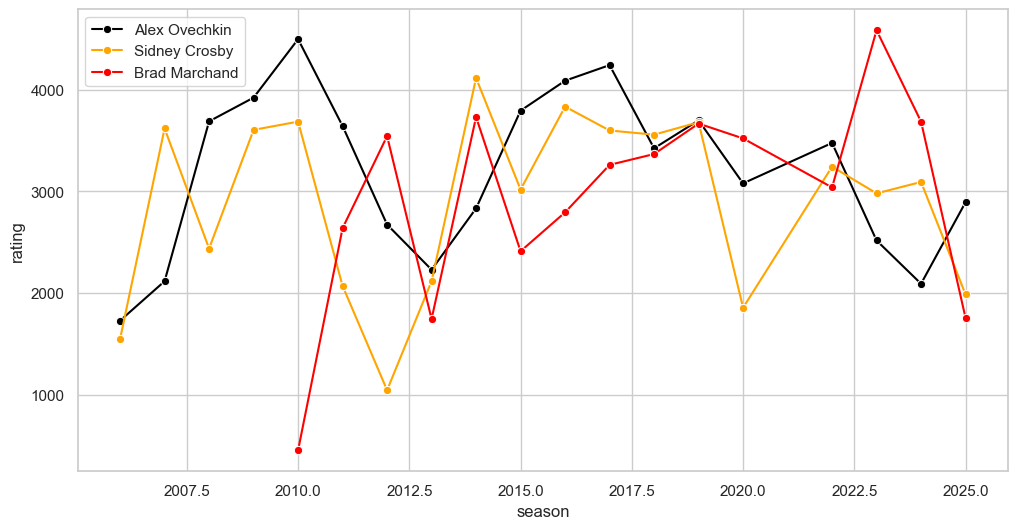

In [94]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data_agg[combined_data_agg['name']=='Alex Ovechkin'],
             x='season', y='rating', marker='o', color='black', label='Alex Ovechkin')
sns.lineplot(data=combined_data_agg[combined_data_agg['name']=='Sidney Crosby'],
             x='season', y='rating', marker='o', color='orange', label='Sidney Crosby')
sns.lineplot(data=combined_data_agg[combined_data_agg['name']=='Brad Marchand'],
             x='season', y='rating', marker='o', color='red', label='Brad Marchand')
# plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
# plt.fill_between(team_data['season'], -3, 0, color='red', alpha=0.2)
# plt.fill_between(team_data['season'], 0, 3, color='green', alpha=0.2)
# plt.xlabel('Season')
# plt.ylabel('Goal Differential per Game')
# plt.xticks(rotation=45)
# plt.tight_layout()

plt.show()